# Modeling

### Import Libraries

In [77]:
import _pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

### Loading the Data

In [86]:
with open('var_df.pkl', 'rb') as fp:
    df = pickle.load(fp)
    
with open('test_df.pkl', 'rb') as fp:
    test = pickle.load(fp)

## Splitting the Data
Into train and testing sets

In [87]:
X = df.drop('WnvPresent', axis=1)
y = df.WnvPresent

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Modeling

In [118]:
# Importing the 10 models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.svm import SVC

## Preventing error from occuring: XGBoost causes kernel to die.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

### Pipeline Creation

In [119]:
# Adaboost
pipe_ada = Pipeline([('clf', AdaBoostClassifier())])

# Gradient Boost
pipe_gb  = Pipeline([('clf', GradientBoostingClassifier())])

# Random Forest
pipe_rf  = Pipeline([('clf', RandomForestClassifier())])

# Decision Tree
pipe_dt  = Pipeline([('clf', DecisionTreeClassifier())])

# Dummy (Baseline)
pipe_dum = Pipeline([('clf', DummyClassifier())])

# K Nearest Neighbors
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])

# Logistic Regression
pipe_lr  = Pipeline([('clf', LogisticRegression())])

# Naive Bayes
pipe_nb  = Pipeline([('clf', ComplementNB())])

# Support Vector Machine
pipe_svm = Pipeline([('clf', SVC())])

# XGBoost
pipe_xgb = Pipeline([('clf', XGBClassifier())])

In [120]:
pipelines = [pipe_ada, pipe_gb, pipe_rf, pipe_dt, pipe_dum, 
             pipe_knn, pipe_lr, pipe_nb, pipe_svm, pipe_xgb]

models = ['Adaboost', 
          'GradientBoost', 
          'RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN', 
          'LogisticRegression',
          'NaiveBayes',
          'SupportVectorMachine',
          'XGBoost']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))

In [121]:
# Looping through each Pipeline to fit and train each model
for name, pipe in model_pipelines.items():
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])
Pipeline(memory=None,
     steps=[('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [122]:
# Dictionary containing the model names and their scores
models_met = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in model_pipelines.items():
    print('\n '+ name + ' -'*30)
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['No Virus', 'Virus'], output_dict=False)
    
    print(report)


 Adaboost - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.95      1.00      0.97      2493
       Virus       0.00      0.00      0.00       134

   micro avg       0.95      0.95      0.95      2627
   macro avg       0.47      0.50      0.49      2627
weighted avg       0.90      0.95      0.92      2627


 GradientBoost - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.95      1.00      0.97      2493
       Virus       0.43      0.02      0.04       134

   micro avg       0.95      0.95      0.95      2627
   macro avg       0.69      0.51      0.51      2627
weighted avg       0.92      0.95      0.93      2627


 RandomForest - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.95      0.98      0.97      2493
       Virus   

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    No Virus       0.95      0.98      0.97      2493
       Virus       0.22      0.10      0.14       134

   micro avg       0.93      0.93      0.93      2627
   macro avg       0.58      0.54      0.55      2627
weighted avg       0.92      0.93      0.92      2627


 LogisticRegression - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.95      1.00      0.97      2493
       Virus       0.00      0.00      0.00       134

   micro avg       0.95      0.95      0.95      2627
   macro avg       0.47      0.50      0.49      2627
weighted avg       0.90      0.95      0.92      2627


 NaiveBayes - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.98      0.62      0.76      2493
       Virus       0.10      0.80      0.18       134

   micro avg       0.63     

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Grid Searching

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# Parameters to Tune
nb_params = {'clf__alpha': [0,.5,1],
             'clf__norm': [True, False]}

rf_params = {'clf__n_estimators': [50,100],
             'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': [None, 2,4],
             'clf__min_samples_split': [2,4],
             'clf__min_samples_leaf': [2, 3]}

knn_params = {"clf__n_neighbors": [5, 25, 50, 100, 200],
              "clf__weights": ['uniform', 'distance'],
              "clf__p": [1,2]}

In [125]:
# Creating a dictionary for the Top Classifiers with their respective parameters
top = {'RandomForest': [pipe_rf, rf_params],
       'KNN': [pipe_knn, knn_params],
       'NaiveBayes': [pipe_nb, nb_params]}

In [126]:
# Dictionary storing the best estimators for each classifier
best_estimators = {}

# Grid Searching each classifier
for name, vals in top.items():
    print(name + ' -'*30)
    
    # Grid Searching 
    gs = GridSearchCV(vals[0], vals[1] , cv=3, return_train_score=True, verbose=2, scoring='f1_macro')
    gs.fit(X_train, y_train)
    
    # Saving the best estimators/tuned models
    best_estimators[name+'_clf'] = gs.best_estimator_

RandomForest - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=50, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   36.4s finished


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__n_estimators=100, total=   0.3s
KNN - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   0.4s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   0.4s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   0.4s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   0.3s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   0.4s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   0.3s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=2, clf__weights=uniform, total=   0.4s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=2, clf__weights=uniform, total=   0.5s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ...........

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=uniform, total=   0.6s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=uniform .............
[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=uniform, total=   0.6s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=uniform, total=   0.7s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=distance, total=   0.6s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=distance, total=   0.5s
[CV] clf__n_neighbors=25, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=25, clf__p=1, clf__weights=distance, total=   0.5s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=uniform, total=   0.6s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=uniform .............
[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=uniform, total=   0.5s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=uniform, total=   0.5s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=distance, total=   0.4s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=distance, total=   0.4s
[CV] clf__n_neighbors=25, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=25, clf__p=2, clf__weights=distance, total=   0.5s
[CV] clf__n_neighbors=50, clf__p=1, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=50, clf__p=1, clf__weights=uniform, total=   0.8s
[CV] clf__n_neighbors=50, clf__p=1, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=50, clf__p=1, clf__weights=uniform, total=   0.6s
[CV] clf__n_neighbors=50, clf__p=1, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=50, clf__p=1, clf__weights=uniform, total=   0.6s
[CV] clf__n_neighbors=50, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=50, clf__p=1, clf__weights=distance, total=   0.8s
[CV] clf__n_neighbors=50, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=50, clf__p=1, clf__weights=distance, total=   0.6s
[CV] clf__n_neighbors=50, clf__p=1, clf__weights=distance ............
[CV]  clf__n_neighbors=50, clf__p=1, clf__weights=distance, total=   0.9s
[CV] clf__n_neighbors=50, clf__p=2, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=50, clf__p=2, clf__weights=uniform, total=   0.7s
[CV] clf__n_neighbors=50, clf__p=2, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=50, clf__p=2, clf__weights=uniform, total=   0.6s
[CV] clf__n_neighbors=50, clf__p=2, clf__weights=uniform .............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=50, clf__p=2, clf__weights=uniform, total=   0.7s
[CV] clf__n_neighbors=50, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=50, clf__p=2, clf__weights=distance, total=   1.2s
[CV] clf__n_neighbors=50, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=50, clf__p=2, clf__weights=distance, total=   0.7s
[CV] clf__n_neighbors=50, clf__p=2, clf__weights=distance ............
[CV]  clf__n_neighbors=50, clf__p=2, clf__weights=distance, total=   0.7s
[CV] clf__n_neighbors=100, clf__p=1, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=100, clf__p=1, clf__weights=uniform, total=   0.8s
[CV] clf__n_neighbors=100, clf__p=1, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=100, clf__p=1, clf__weights=uniform, total=   0.8s
[CV] clf__n_neighbors=100, clf__p=1, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=100, clf__p=1, clf__weights=uniform, total=   0.8s
[CV] clf__n_neighbors=100, clf__p=1, clf__weights=distance ...........
[CV]  clf__n_neighbors=100, clf__p=1, clf__weights=distance, total=   0.7s
[CV] clf__n_neighbors=100, clf__p=1, clf__weights=distance ...........
[CV]  clf__n_neighbors=100, clf__p=1, clf__weights=distance, total=   0.7s
[CV] clf__n_neighbors=100, clf__p=1, clf__weights=distance ...........
[CV]  clf__n_neighbors=100, clf__p=1, clf__weights=distance, total=   0.8s
[CV] clf__n_neighbors=100, clf__p=2, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=100, clf__p=2, clf__weights=uniform, total=   1.0s
[CV] clf__n_neighbors=100, clf__p=2, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=100, clf__p=2, clf__weights=uniform, total=   1.1s
[CV] clf__n_neighbors=100, clf__p=2, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=100, clf__p=2, clf__weights=uniform, total=   1.0s
[CV] clf__n_neighbors=100, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=100, clf__p=2, clf__weights=distance, total=   1.0s
[CV] clf__n_neighbors=100, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=100, clf__p=2, clf__weights=distance, total=   0.7s
[CV] clf__n_neighbors=100, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=100, clf__p=2, clf__weights=distance, total=   0.8s
[CV] clf__n_neighbors=200, clf__p=1, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=200, clf__p=1, clf__weights=uniform, total=   1.1s
[CV] clf__n_neighbors=200, clf__p=1, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=200, clf__p=1, clf__weights=uniform, total=   1.5s
[CV] clf__n_neighbors=200, clf__p=1, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=200, clf__p=1, clf__weights=uniform, total=   0.9s
[CV] clf__n_neighbors=200, clf__p=1, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=1, clf__weights=distance, total=   1.3s
[CV] clf__n_neighbors=200, clf__p=1, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=1, clf__weights=distance, total=   0.9s
[CV] clf__n_neighbors=200, clf__p=1, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=1, clf__weights=distance, total=   0.9s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=uniform, total=   1.2s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=uniform, total=   1.1s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=uniform ............


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=uniform, total=   0.9s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=distance, total=   1.0s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=distance, total=   1.0s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=distance, total=   0.8s
NaiveBayes - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] clf__alpha=0, clf__norm=True ....................................
[CV] ..................... clf__alpha=0, clf__norm=True, total=   0.0s
[CV] clf__alpha=0, clf__norm=True ....................................
[CV] ..................... clf__alpha=0, clf__norm=True, total=   0.0s
[CV] clf__alpha=0, clf__norm=True ....................................
[C

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] .................... clf__alpha=0, clf__norm=False, total=   0.0s
[CV] clf__alpha=0, clf__norm=False ...................................
[CV] .................... clf__alpha=0, clf__norm=False, total=   0.0s
[CV] clf__alpha=0, clf__norm=False ...................................
[CV] .................... clf__alpha=0, clf__norm=False, total=   0.0s
[CV] clf__alpha=0.5, clf__norm=True ..................................
[CV] ................... clf__alpha=0.5, clf__norm=True, total=   0.0s
[CV] clf__alpha=0.5, clf__norm=True ..................................
[CV] ................... clf__alpha=0.5, clf__norm=True, total=   0.0s
[CV] clf__alpha=0.5, clf__norm=True ..................................
[CV] ................... clf__alpha=0.5, clf__norm=True, total=   0.0s
[CV] clf__alpha=0.5, clf__norm=False .................................
[CV] .................. clf__alpha=0.5, clf__norm=False, total=   0.0s
[CV] clf__alpha=0.5, clf__norm=False .................................
[CV] .

/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] ..................... clf__alpha=1, clf__norm=True, total=   0.0s
[CV] clf__alpha=1, clf__norm=True ....................................
[CV] ..................... clf__alpha=1, clf__norm=True, total=   0.0s
[CV] clf__alpha=1, clf__norm=False ...................................
[CV] .................... clf__alpha=1, clf__norm=False, total=   0.1s
[CV] clf__alpha=1, clf__norm=False ...................................
[CV] .................... clf__alpha=1, clf__norm=False, total=   0.0s
[CV] clf__alpha=1, clf__norm=False ...................................
[CV] .................... clf__alpha=1, clf__norm=False, total=   0.0s


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Classification Reports

In [127]:
# Looping through each tuned model's predictions and getting their classification reports
for name, pipe in best_estimators.items():
    print('\nTuned '+ name + ' -'*30)
    
    report = classification_report(y_test, pipe.predict(X_test), target_names=['No Virus', 'Virus'], output_dict=False)
    print(report)


Tuned RandomForest_clf - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.95      0.99      0.97      2493
       Virus       0.33      0.08      0.13       134

   micro avg       0.94      0.94      0.94      2627
   macro avg       0.64      0.54      0.55      2627
weighted avg       0.92      0.94      0.93      2627


Tuned KNN_clf - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.95      0.98      0.97      2493
       Virus       0.22      0.12      0.15       134

   micro avg       0.93      0.93      0.93      2627
   macro avg       0.58      0.55      0.56      2627
weighted avg       0.92      0.93      0.92      2627


Tuned NaiveBayes_clf - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
              precision    recall  f1-score   support

    No Virus       0.98      0.62      0.76      2

### Confusion Matrix

In [128]:
def plot_confusion_matrix(y_true, y_pred, labels=['No Virus','Virus'],
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

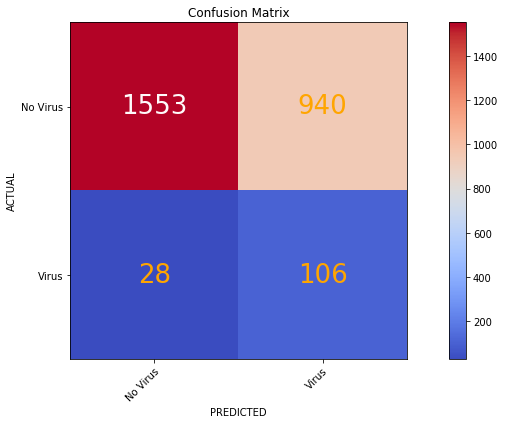

In [129]:
plot_confusion_matrix(y_test, best_estimators['NaiveBayes_clf'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

Because we are dealing with an imbalanced dataset we cannot use __Accuracy__ as an evaluation metric.  Instead, since we are more concerned with detecting the West Nile Virus.  With that in mind, we must use __Recall__ as the preferred metric.  __Recall__ is more concerned with detecting the WNV.  __Precision__ is not too much of our concern because _False Positives_ are more acceptable than _False Negatives_.  We don't want to miss any WNV detection.